In [3]:
%pwd

'E:\\GAN for Face expression Classification\\Research Kartik'

In [3]:
import os

In [4]:
os.chdir("../")

In [5]:
%pwd

'E:\\GAN for Face expression Classification'

In [6]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [7]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# Define base directory for saved models
save_dir = Path(os.getcwd()) / "Model/Class_based_gan/angry"

In [14]:
#Parameters

# Root directory for dataset
dataroot = Path(os.getcwd()) / "Dataset/images" / "Balanced_train" / "angry"

# Number of workers for dataloader
workers = 0

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 115

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [15]:
import torch
import torch.nn as nn
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

In [16]:
# Deciding which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
device

device(type='cpu')

In [61]:
netG = Generator(ngpu).to(device)  # Assuming Generator class is defined
netG.load_state_dict(torch.load(os.path.join(save_dir, 'netG_epoch_19.pth'), map_location=torch.device('cpu')))
netG.eval()  # Set the generator to evaluation mode

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

Enter the number of images to generate:  30


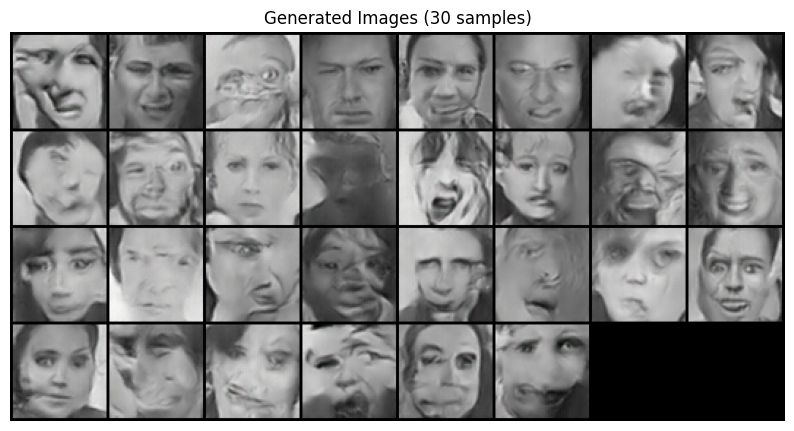

In [63]:
# Define the number of images to generate
num_images = int(input("Enter the number of images to generate: "))

# Generate random noise
fixed_noise = torch.randn(num_images, nz, 1, 1)

# Generate images using the generator
with torch.no_grad():
    fake_images = netG(fixed_noise).detach().cpu()

# Display the generated images
fig = plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title(f"Generated Images ({num_images} samples)")
plt.imshow(np.transpose(make_grid(fake_images, padding=2, normalize=True), (1, 2, 0)))
plt.show()